In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'ieee'])
plt.rcParams.update({'font.size': 12})

In [2]:
def laser_mode(t,j,n=1,phi=0,L=1):
    """
    Generate a laser mode signal.

    Parameters:
    t : array_like
        Time array.
    j : int
        Mode number.
    phi : float, optional
        Phase shift in radians. Default is 0.
    L : float, optional
        Length of the cavity. Default is 1.
    n : real
        Refractive index of the medium.

    Returns:
    array_like
        Laser mode signal.
    """
    c = 3e8  # Speed of light in m/s
    A = np.exp(-1j*(2 * np.pi * j * t * c / L / n + phi))
    return A + np.conj(A)

def wl2f(wl, n=1):
    """
    Convert wavelength to frequency.

    Parameters:
    wl : float
        Wavelength in meters.
    n : real
        Refractive index of the medium.

    Returns:
    float
        Frequency in Hz.
    """
    c = 3e8  # Speed of light in m/s
    return c / (wl * n)

C:\Users\dinusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\dinusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


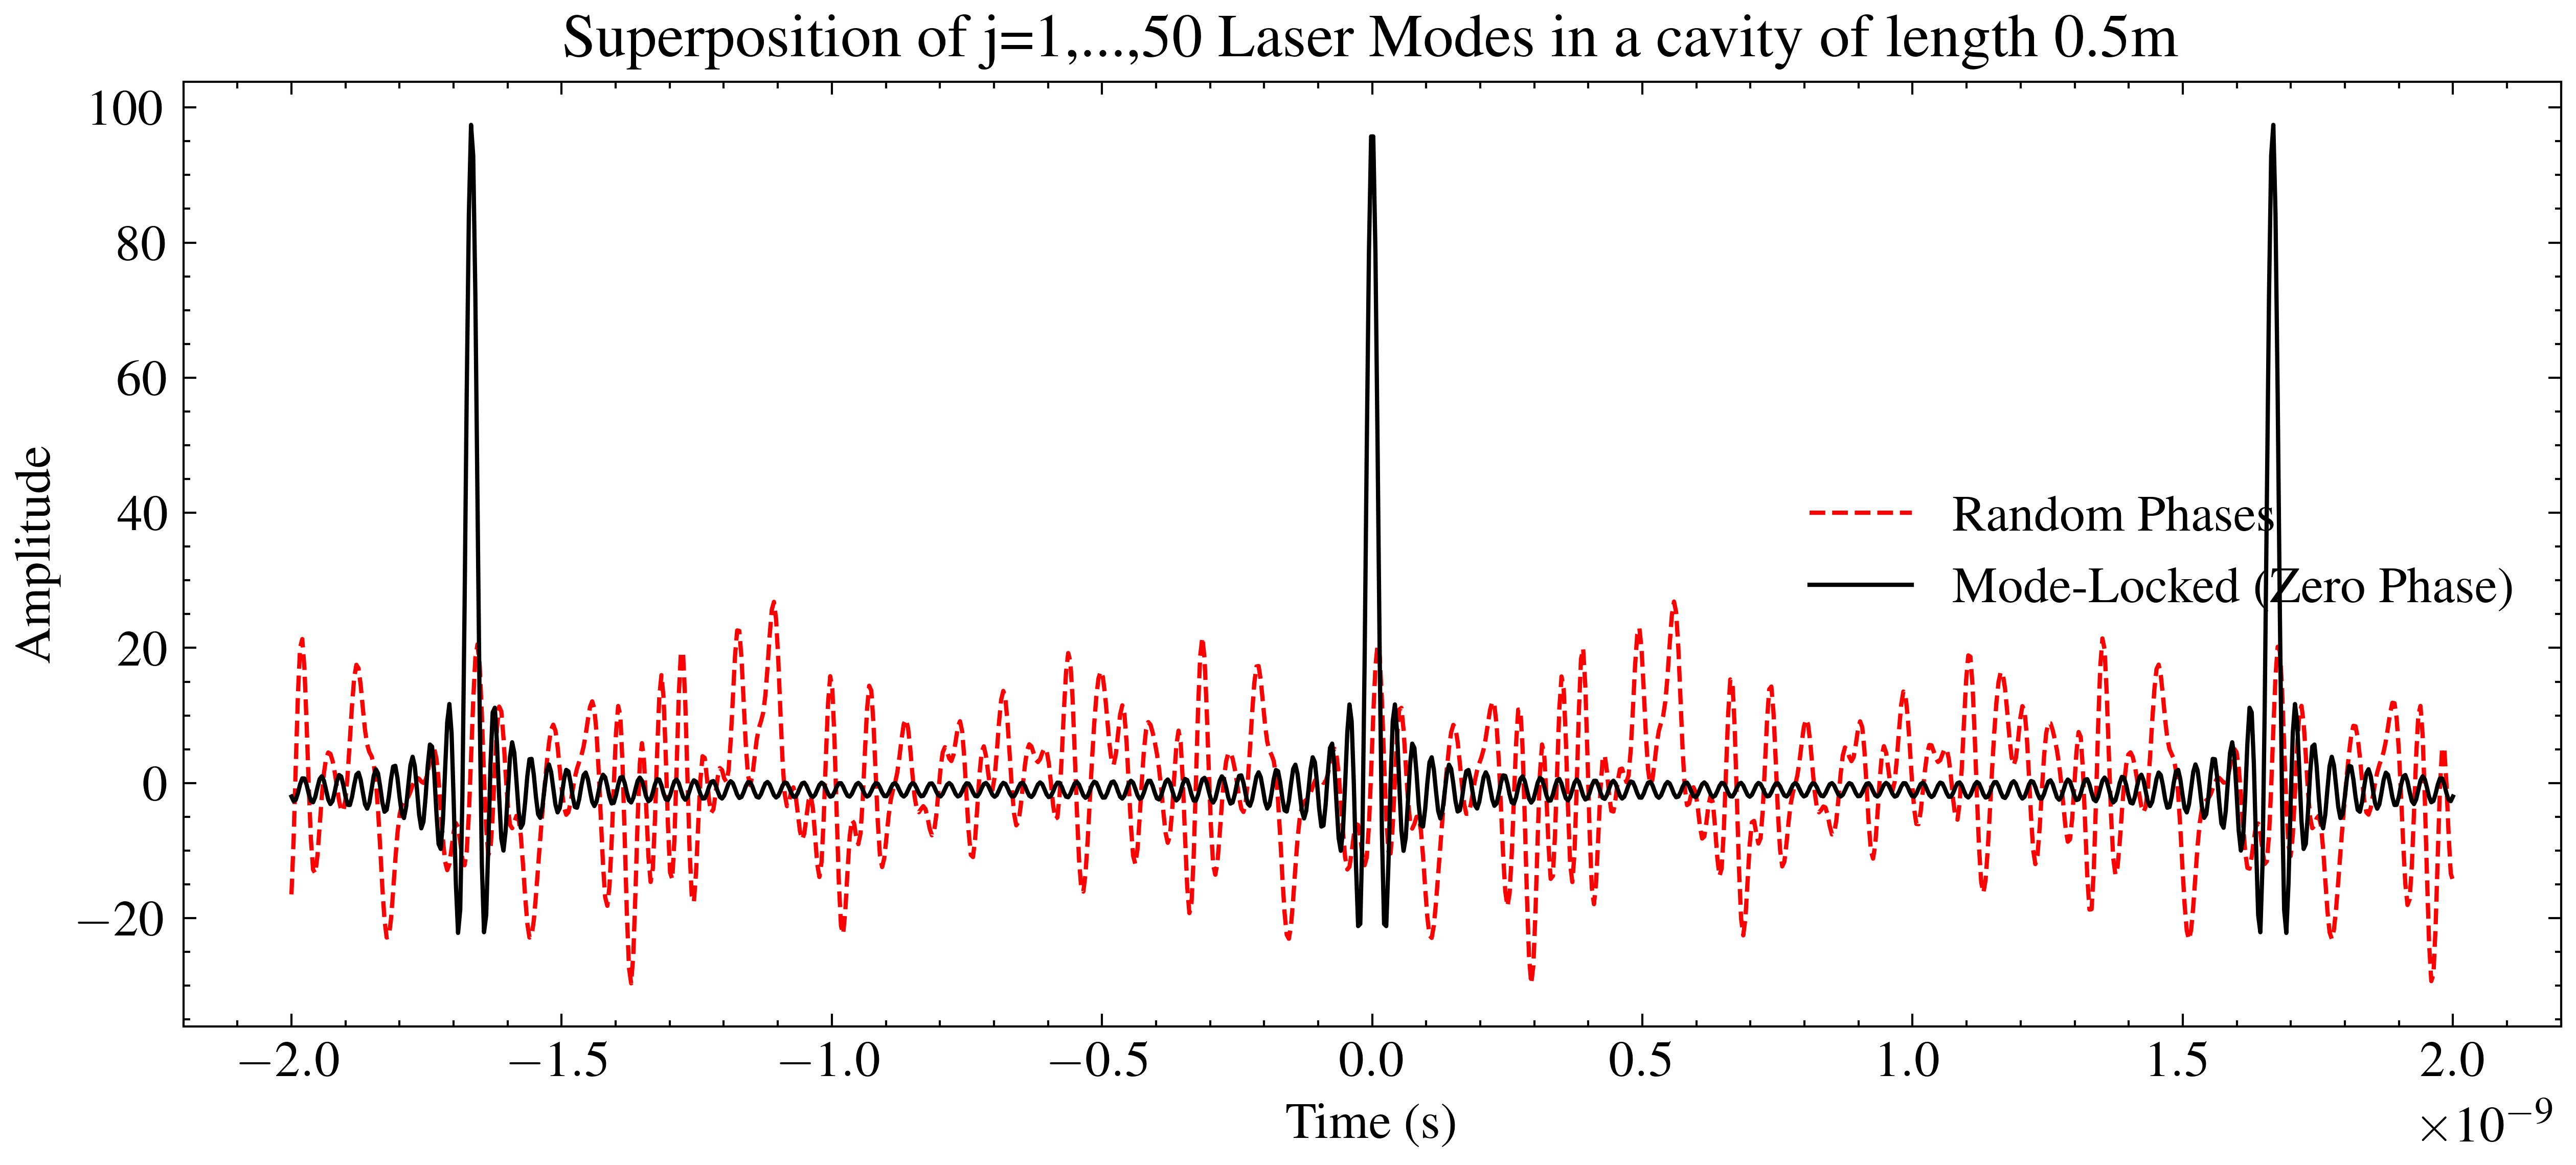

In [3]:
j_i,j_f = 1, 50
L= 0.5
t = np.linspace(-2e-9, 2e-9, 1000)
plt.figure(figsize=(10, 4))
modes_rnd = [laser_mode(t, j,phi=2*np.pi*np.random.rand(),L=L) for j in range(j_i, j_f)]
superposition_rnd = np.sum(modes_rnd, axis=0)
plt.plot(t, superposition_rnd, '--r', label='Random Phases')
modes_ml = [laser_mode(t, j,L=L) for j in range(j_i, j_f)]
superposition_ml = np.sum(modes_ml, axis=0)
plt.plot(t, superposition_ml, '-k', label='Mode-Locked (Zero Phase)')
plt.title(f'Superposition of j={j_i},...,{j_f} Laser Modes in a cavity of length {L}m')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

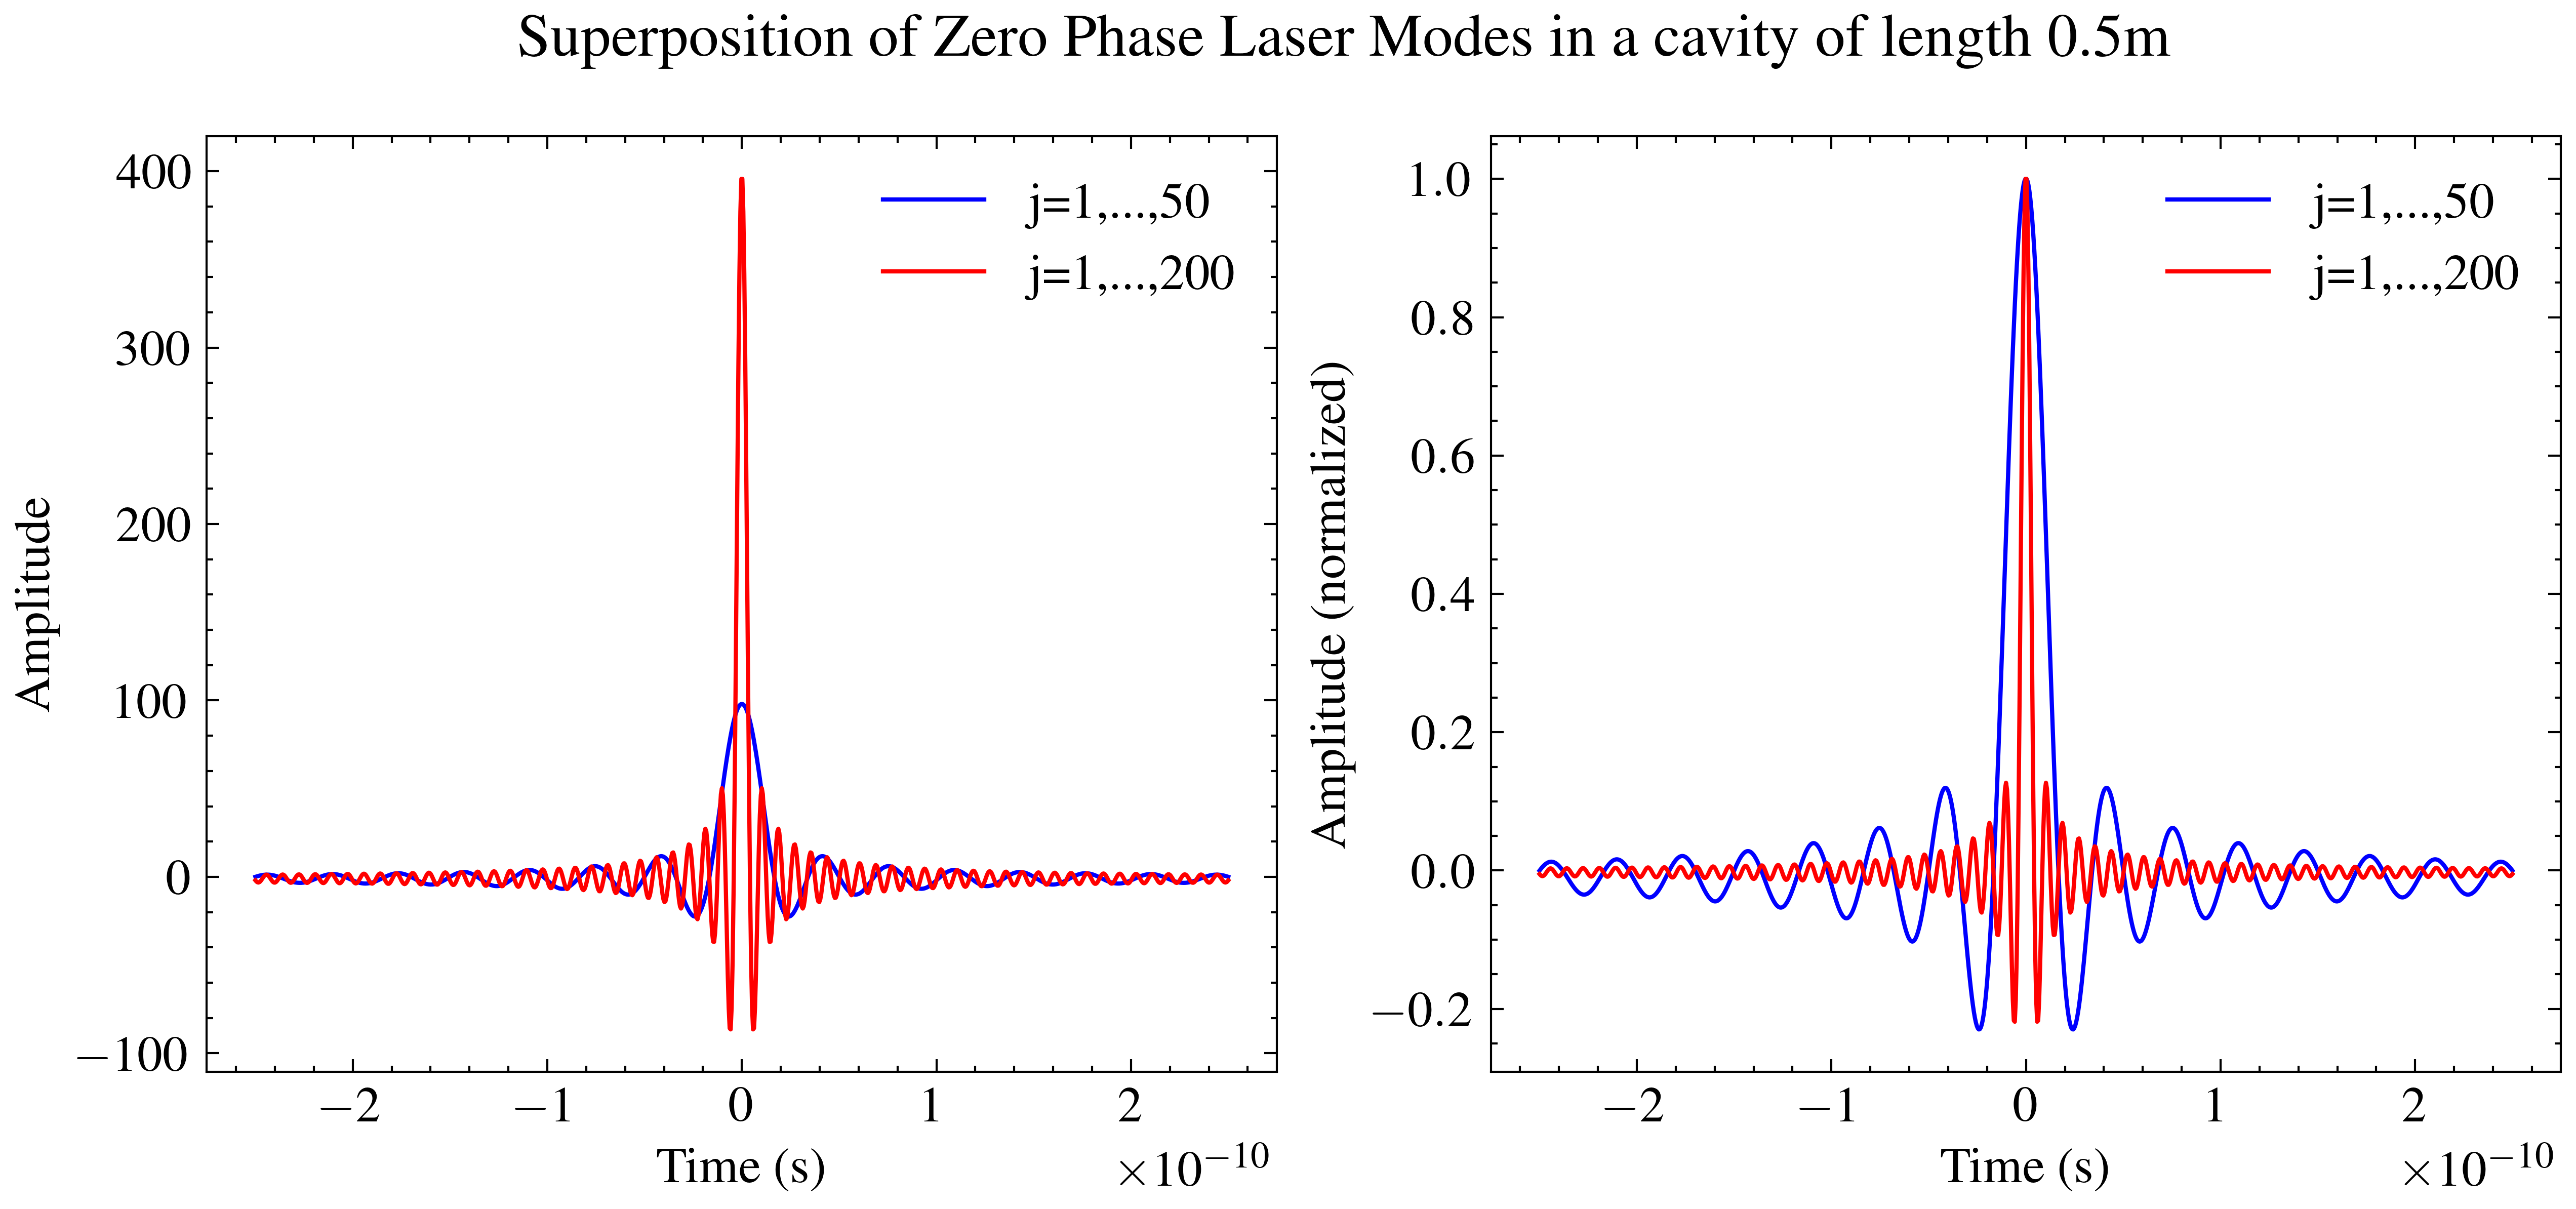

In [4]:
j_i1,j_f1 = 1, 50
j_i2,j_f2 = 1, 200
L= 0.5
t = np.linspace(-0.25e-9, 0.25e-9, 1000)
fig,ax=plt.subplots(1,2,figsize=(10, 4))
modes_1 = [laser_mode(t, j,L=L) for j in range(j_i1, j_f1)]
superposition_1 = np.sum(modes_1, axis=0)
ax[0].plot(t, superposition_1, '-b', label=f'j={j_i1},...,{j_f1}')
modes_2 = [laser_mode(t, j,L=L) for j in range(j_i2, j_f2)]
superposition_2 = np.sum(modes_2, axis=0)
ax[0].plot(t, superposition_2, '-r', label=f'j={j_i2},...,{j_f2}')
#ax[0].set_title(f'Superposition of Zero Phase Laser Modes in a cavity of length {L}m')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].legend()

ax[1].plot(t, superposition_1/np.max(superposition_1), '-b', label=f'j={j_i1},...,{j_f1}')
ax[1].plot(t, superposition_2/np.max(superposition_2), '-r', label=f'j={j_i2},...,{j_f2}')
plt.suptitle(f'Superposition of Zero Phase Laser Modes in a cavity of length {L}m')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude (normalized)')
ax[1].legend()

In [5]:
#Ti:S gain bandwidth:
wl1,wl2 = 790e-9, 800e-9
c = 3e8
f_rep = 76e6
L = c/f_rep/2
del_f_gain = wl2f(wl1) - wl2f(wl2)
central_freq = (wl2f(wl1) + wl2f(wl2))/2
central_mode = L/((wl2-wl1)/2/2)
N_modes = del_f_gain / f_rep
print(f'Gain bandwidth: {del_f_gain/1e12:.2f} THz\nCentral frequency: {central_freq/1e12:.2f} THz\ncentral mode index: {central_mode:.0f}\nNumber of modes: {N_modes:.0f}\nCavity length: {L:.2f} m')

Gain bandwidth: 4.75 THz
Central frequency: 377.37 THz
central mode index: 789473684
Number of modes: 62458
Cavity length: 1.97 m


In [6]:
t = np.linspace(-500e-15, 500e-15, 1000)
modes_gain = [laser_mode(t, j,L=L) for j in range(int(central_mode - N_modes/2), int(central_mode + N_modes/2))]
superposition_gain = np.sum(modes_gain, axis=0)
superposition_gain = superposition_gain/np.max(superposition_gain)

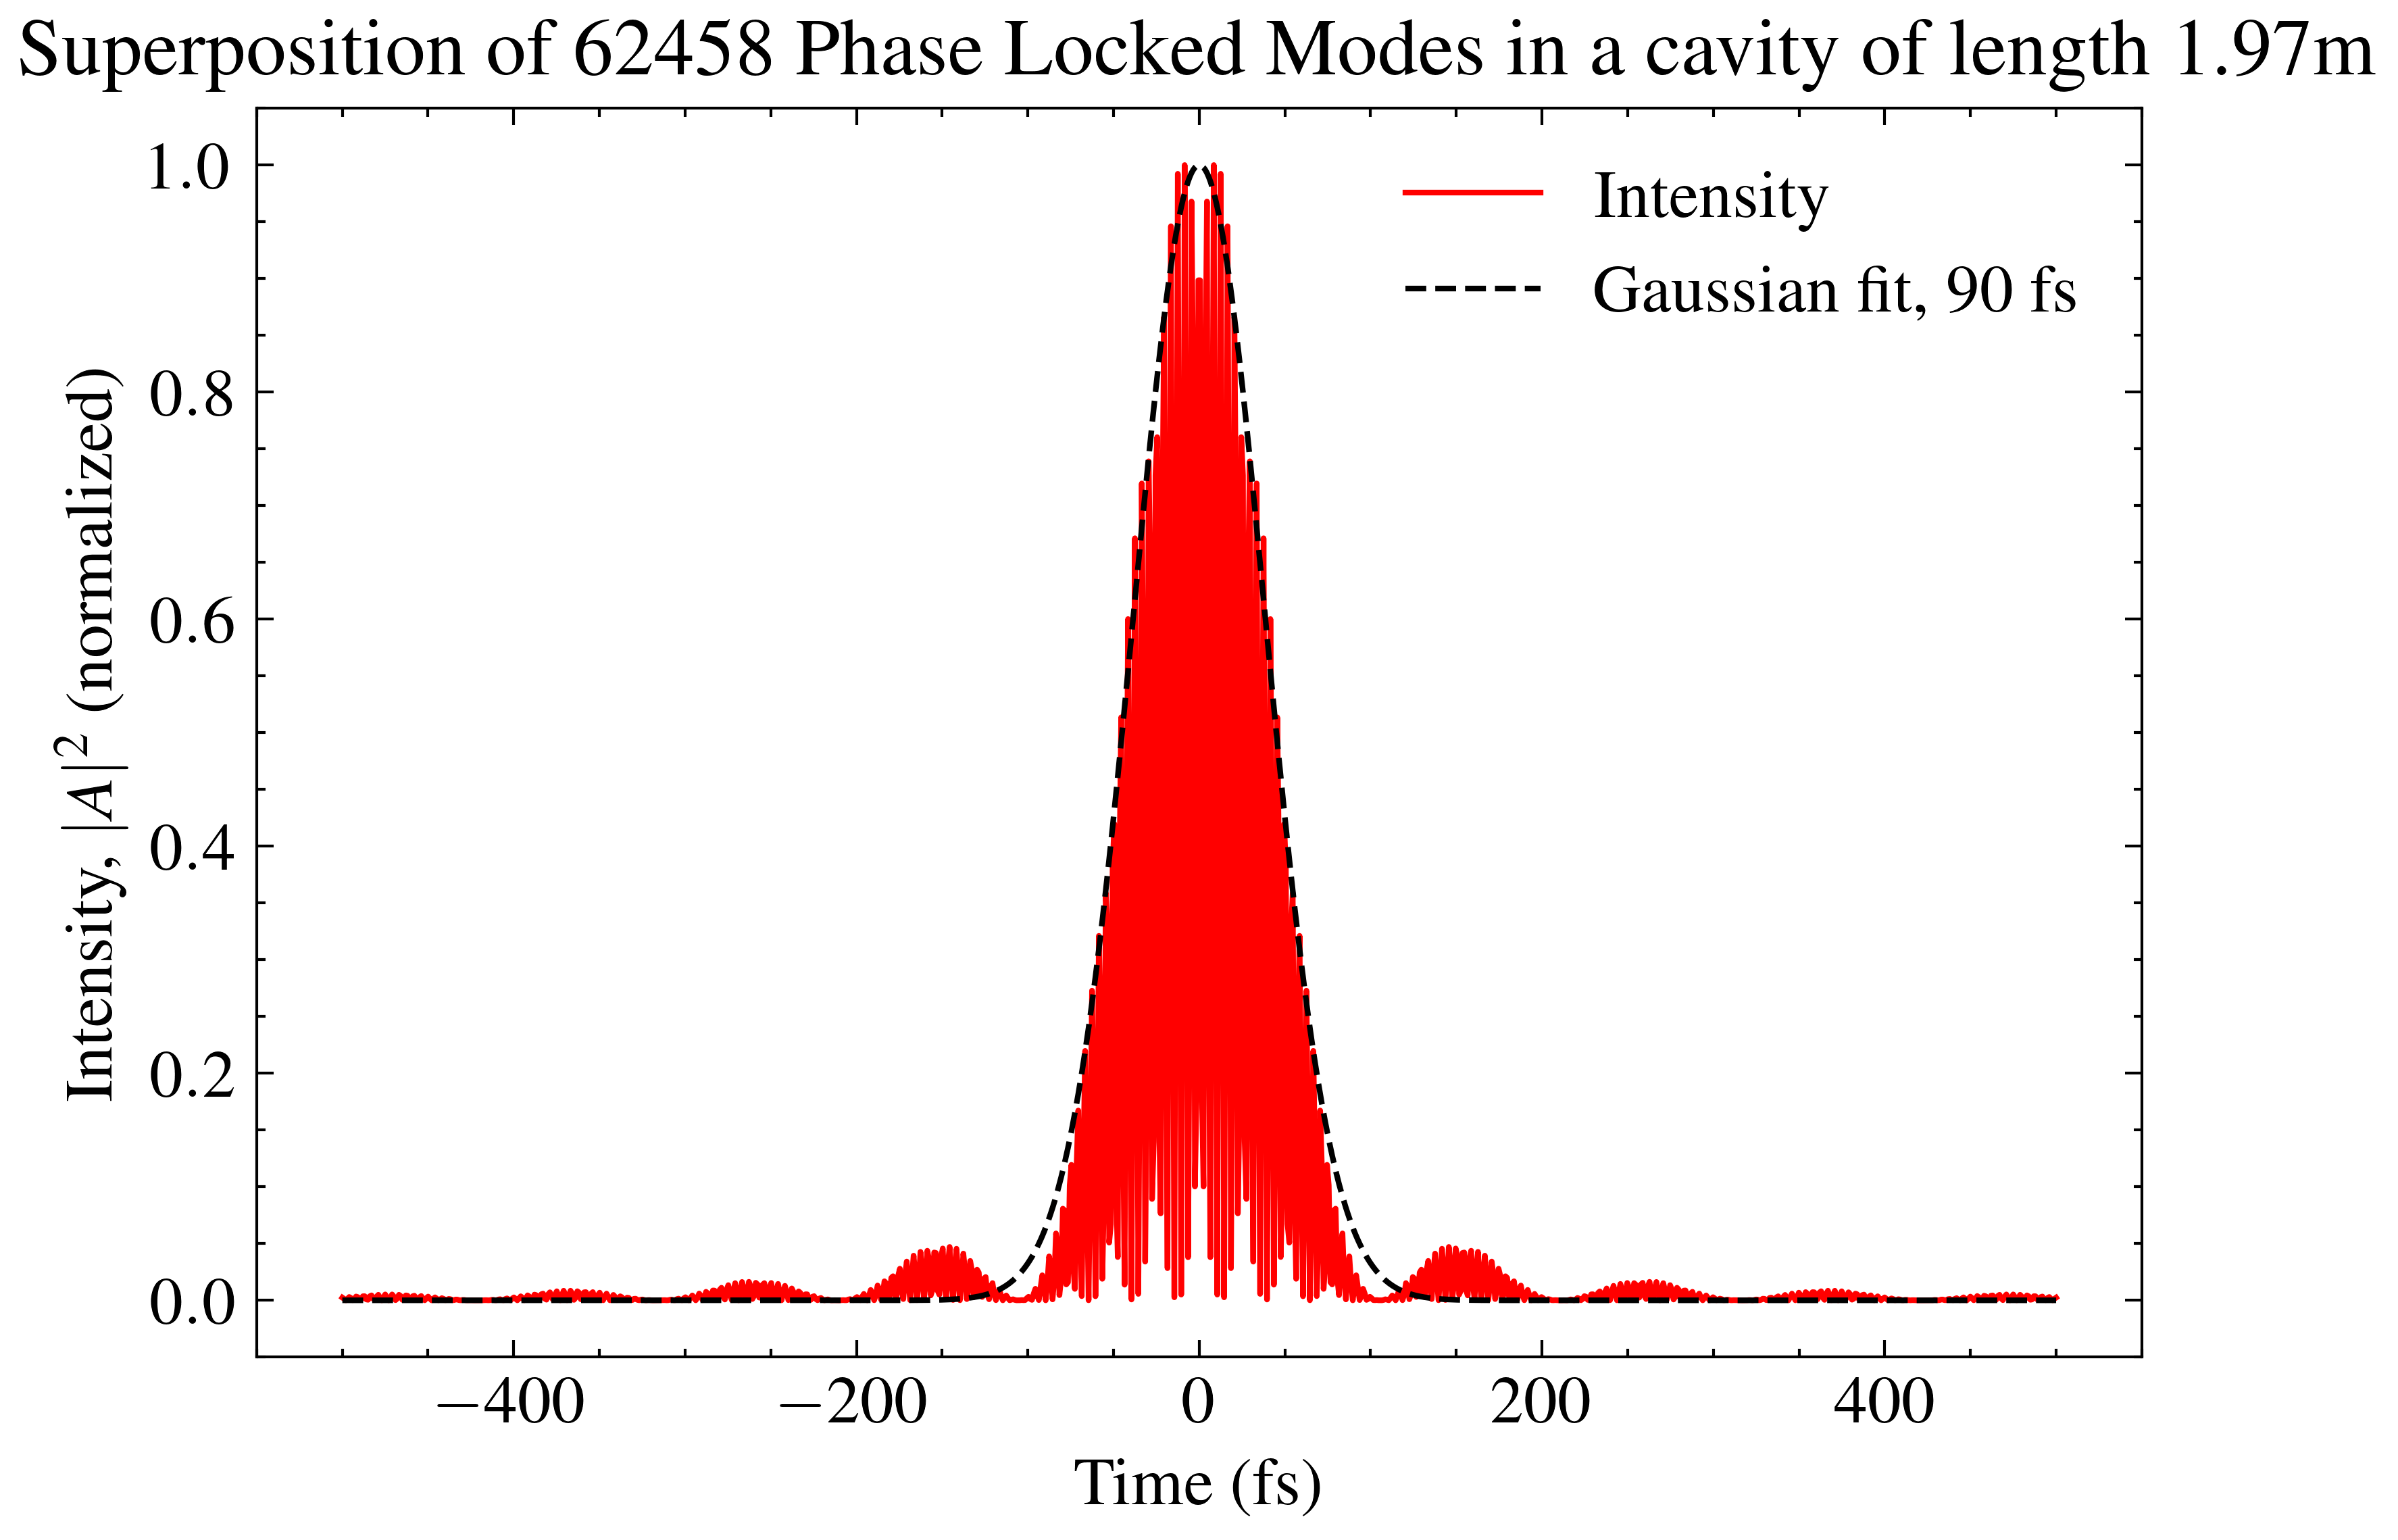

In [7]:
plt.figure(figsize=(6, 4))
#plt.plot(t/1e-15, superposition_gain, '-k', label='Mode-Locked (Zero Phase)')
plt.plot(t/1e-15, np.real(superposition_gain*np.conj(superposition_gain)), '-r', label='Intensity')
plt.plot(t/1e-15, np.exp(-4*np.log(2)*t**2/(90e-15)**2), '--k', label='Gaussian fit, 90 fs')
plt.title(f'Superposition of {N_modes:.0f} Phase Locked Modes in a cavity of length {L:.2f}m')
plt.xlabel('Time (fs)')
plt.ylabel('Intensity, $|A|^2$ (normalized)')
plt.legend()
plt.show()